# Download dataset

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7QNckPiMtiG2iEUmcCyr")
project = rf.workspace("vo-thanh-nguyen").project("nguyen_dep_trai_all_in_one")
version = project.version(10)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Nguyen_dep_trai_all_in_one-10 in yolov8:: 100%|██████████| 9018/9018 [00:01<00:00, 7665.10it/s]


# Import Library

In [ ]:
 
!pip install --upgrade ultralytics torchattacks
from ultralytics import YOLO 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import shutil
from PIL import Image
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chard

# Define path

In [3]:
data_path = "/kaggle/working/Nguyen_dep_trai_all_in_one-10/data.yaml"
pretrained_path = "/kaggle/input/bestnew/pytorch/default/1/best5.pt"
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


# Training

In [ ]:
from ultralytics.models.yolo.segment import SegmentationTrainer

# Configuration with advanced parameters
args = {
    # ======== Data & Model ========
    "data": data_path,
    "model": pretrained_path,  # Using nano version for hardware limits
    "pretrained": True,         # Start from official pretrained weights
    
    # ======== Training Parameters ========
    "epochs": 300,              # Increased with early stopping
    "batch": 24,                # Reduced for VRAM conservation
    "imgsz": 640,
    "patience": 30,             # More generous early stopping
    
    # ======== Advanced Optimization ========
    "lr0": 0.00007,               # Initial learning rate (lower than default)
    "momentum": 0.9,
    "weight_decay": 0.0005,     # L2 regularization
    "optimizer": "AdamW",       # Better for small batches than SGD
    
    # ======== Advanced Augmentation ========
    "degrees": 15.0,            # Rotation
    "shear": 0.2,
    "perspective": 0.001,
    "fliplr": 0.0,            
    "mosaic": 0.0,            
    "mixup": 0.1,              
    "copy_paste": 0.1,        
    
    # ======== Model Architecture ========
    "dropout": 0.25,            
    
    # ======== Advanced Training ========
    "label_smoothing": 0.15,   
    "close_mosaic": 15,       
    "cos_lr": True,          
    "box": 8.5,             
    "cls": 0.3,               
    "dfl": 1.5,               
    "hsv_h": 0.015,          
    "hsv_s": 0.7,              
    "hsv_v": 0.4,              
    "translate": 0.1,         
    "scale": 0.25,
    # ======== System & Logging ========
    "device": str(device),         
    "exist_ok": True,
    "project": "yolo-finetune",
    "name": "advanced_run",
    "half": True,             
    "overlap_mask": True,      
    "mask_ratio": 1,          
    "single_cls": False,       
    "verbose": True,
}

# Initialize trainer with validation checks
trainer = SegmentationTrainer(overrides = args)


trainer.train()

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/input/bestnew/pytorch/default/1/best5.pt, data=/kaggle/working/Nguyen_dep_trai_all_in_one-10/data.yaml, epochs=300, time=None, patience=30, batch=24, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=yolo-finetune, name=advanced_run, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=15, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=1, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

100%|██████████| 755k/755k [00:00<00:00, 4.55MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Nguyen_dep_trai_all_in_one-10/train/labels... 3686 images, 4 backgrounds, 0 corrupt: 100%|██████████| 3686/3686 [00:03<00:00, 1009.14it/s]


train: New cache created: /kaggle/working/Nguyen_dep_trai_all_in_one-10/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/Nguyen_dep_trai_all_in_one-10/valid/labels... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<00:00, 630.83it/s]


val: New cache created: /kaggle/working/Nguyen_dep_trai_all_in_one-10/valid/labels.cache
Plotting labels to yolo-finetune/advanced_run/labels.jpg... 
optimizer: AdamW(lr=7e-05, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005625000000000001), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to yolo-finetune/advanced_run
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/300      4.05G     0.6704     0.9509     0.2341     0.9708         43        640: 100%|██████████| 154/154 [00:56<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]

                   all        600       1314      0.923      0.919      0.959       0.73      0.925      0.883      0.922      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.14G     0.6225      0.889     0.2068     0.9511         34        640: 100%|██████████| 154/154 [00:53<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314      0.956      0.959      0.975      0.807      0.943      0.947      0.959      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/300      4.11G     0.6007     0.8478     0.1982     0.9407         28        640: 100%|██████████| 154/154 [00:53<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.955      0.969      0.976      0.813      0.948      0.958      0.964      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.09G     0.5828     0.8288     0.1906     0.9358         26        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        600       1314      0.963      0.965      0.976      0.814      0.955      0.952      0.959      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.08G     0.5849     0.8235     0.1902     0.9328         32        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.17it/s]

                   all        600       1314      0.965      0.967      0.978      0.816      0.952      0.955      0.961      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.07G     0.5772     0.8294      0.188     0.9296         32        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        600       1314      0.964      0.968      0.978      0.817      0.953      0.953      0.961       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.04G     0.5787     0.8211     0.1872     0.9327         31        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.967      0.966      0.978       0.82      0.954      0.951      0.959      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.03G     0.5745     0.8078     0.1835     0.9276         42        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314      0.966      0.967      0.978      0.822      0.955      0.955      0.961      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.05G     0.5734      0.805     0.1841      0.928         53        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.967      0.962      0.978      0.819      0.953      0.947       0.96      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.11G     0.5706     0.8007     0.1837     0.9315         21        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]

                   all        600       1314      0.966      0.963      0.977      0.819      0.957      0.955      0.964      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.05G     0.5771     0.8092     0.1861     0.9334         26        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        600       1314      0.965      0.963      0.977      0.815      0.954      0.954      0.964      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/300      4.06G     0.5701     0.8005     0.1824     0.9278         41        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.964      0.964      0.978      0.816      0.952      0.951      0.963      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/300         4G     0.5675     0.8059     0.1826     0.9266         33        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314       0.96      0.967      0.977       0.82      0.955      0.952      0.964      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.11G     0.5682     0.7975     0.1842     0.9245         31        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.17it/s]

                   all        600       1314      0.964      0.967      0.979      0.817      0.956      0.957      0.967      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.09G     0.5645     0.7849      0.181     0.9296         26        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314      0.963      0.968      0.979      0.819      0.954      0.953      0.965      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.09G     0.5559     0.7871     0.1788     0.9219         22        640: 100%|██████████| 154/154 [00:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        600       1314      0.966      0.966      0.979       0.82      0.954      0.954      0.964      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.04G     0.5749     0.8169     0.1845      0.931         27        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        600       1314      0.962      0.965      0.977      0.821      0.954      0.952      0.964      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/300      4.02G     0.5607     0.7914     0.1785     0.9238         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314       0.96      0.969      0.979      0.822      0.953      0.952      0.961      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/300      3.99G      0.564      0.791     0.1808     0.9282         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        600       1314      0.965      0.967      0.978       0.82      0.954      0.953      0.962       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.01G     0.5531      0.787     0.1767     0.9187         34        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        600       1314      0.965      0.964      0.979      0.821      0.953      0.949      0.962      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.07G     0.5645     0.7926      0.179     0.9212         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        600       1314      0.962      0.969      0.978       0.82      0.951      0.956      0.961      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.11G     0.5657     0.7932     0.1795     0.9244         27        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]

                   all        600       1314      0.965      0.964      0.978      0.823      0.952      0.952      0.962      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.09G     0.5638      0.791     0.1822     0.9269         30        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.963      0.964      0.978       0.82      0.956      0.954      0.964      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/300      4.01G     0.5567     0.7725     0.1775     0.9188         33        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.965      0.965      0.978       0.82      0.955      0.951      0.962      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.05G     0.5654     0.7883     0.1805     0.9256         27        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314      0.956      0.967      0.977      0.821      0.954      0.949      0.961      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/300      4.09G      0.554     0.7809     0.1782     0.9195         38        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314       0.96      0.964      0.977       0.82      0.952      0.955      0.964      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/300       4.1G     0.5532      0.782      0.178     0.9169         31        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        600       1314      0.962      0.963      0.977      0.822      0.953       0.95      0.961      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/300      4.02G     0.5565     0.7728     0.1772     0.9224         33        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        600       1314      0.961      0.962      0.978      0.825      0.952      0.953      0.965      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/300      4.04G     0.5562      0.783     0.1762     0.9189         33        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.961      0.968      0.979      0.823      0.956       0.95      0.964      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/300      4.07G     0.5554     0.7872     0.1759     0.9219         36        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        600       1314      0.963      0.966      0.978       0.82      0.955      0.946      0.959       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/300      4.01G     0.5567     0.7831     0.1746      0.916         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.971      0.964       0.98       0.82      0.958      0.947      0.962      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/300      4.03G     0.5533     0.7755     0.1748     0.9175         36        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.964      0.966      0.978      0.823      0.953      0.949      0.959      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/300      4.13G     0.5548     0.7839     0.1768     0.9234         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        600       1314      0.962      0.966      0.978      0.822      0.952      0.951       0.96      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.01G     0.5481     0.7695     0.1744     0.9188         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        600       1314      0.961      0.966      0.977      0.821       0.95      0.955      0.962      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.04G      0.549     0.7723     0.1768     0.9187         37        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        600       1314      0.961      0.966      0.979       0.82      0.955      0.949      0.963       0.72



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/300      4.01G     0.5531      0.781     0.1751     0.9209         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314       0.96      0.967      0.979       0.82      0.949      0.957      0.965      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.03G     0.5452     0.7767     0.1741     0.9159         40        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.964      0.965      0.979      0.824      0.955      0.948      0.961      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.03G      0.548      0.758     0.1741     0.9193         47        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        600       1314      0.965      0.965      0.978      0.823      0.954       0.95      0.963      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/300      4.06G     0.5568     0.7867     0.1748     0.9241         34        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]

                   all        600       1314      0.966      0.964      0.978      0.819      0.955      0.953      0.965      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.11G     0.5432     0.7682      0.172     0.9153         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]

                   all        600       1314      0.963      0.964      0.978      0.822      0.953      0.952      0.961      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/300         4G     0.5489     0.7792     0.1753     0.9168         23        640: 100%|██████████| 154/154 [00:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314       0.96      0.969      0.978      0.823      0.954      0.957      0.963      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/300      4.05G     0.5499     0.7685     0.1742     0.9151         38        640: 100%|██████████| 154/154 [00:53<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        600       1314      0.968      0.966       0.98      0.824      0.959      0.954      0.964      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.04G     0.5448     0.7762     0.1764     0.9176         33        640: 100%|██████████| 154/154 [00:53<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.966      0.966      0.979      0.823      0.956      0.952      0.963      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.07G     0.5538     0.7754     0.1776     0.9238         30        640: 100%|██████████| 154/154 [00:53<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.963      0.969      0.979      0.824      0.951      0.956      0.962      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.07G     0.5426     0.7691     0.1739     0.9162         41        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        600       1314      0.963      0.967      0.979      0.825      0.954      0.954      0.963      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/300      4.03G     0.5509     0.7771     0.1737     0.9173         21        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]

                   all        600       1314      0.966      0.967      0.978      0.824      0.953      0.955      0.963      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/300      4.05G      0.547     0.7944     0.1746     0.9198         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        600       1314      0.967      0.966      0.979      0.828      0.952      0.953      0.961      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/300      4.11G     0.5382     0.7654      0.171     0.9144         19        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314      0.966      0.964      0.978      0.826      0.953      0.951      0.962      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/300      4.09G     0.5485      0.772     0.1751     0.9187         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.964      0.965      0.978      0.824      0.952      0.953      0.963      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/300      4.03G     0.5456     0.7652     0.1745     0.9172         34        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.965      0.968      0.979      0.824      0.953      0.954      0.962      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/300      4.07G     0.5502     0.7754     0.1746     0.9149         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]

                   all        600       1314      0.963      0.966      0.978      0.824      0.951      0.954      0.963      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/300      4.02G     0.5403     0.7646     0.1703     0.9123         30        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        600       1314      0.965      0.966      0.978      0.824      0.953      0.953      0.961      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/300      3.99G     0.5499     0.7792      0.177      0.919         26        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        600       1314      0.962      0.963      0.977      0.823      0.953      0.951      0.961      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/300      4.01G     0.5385     0.7547     0.1717      0.912         39        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]

                   all        600       1314      0.966      0.968      0.979      0.824      0.958      0.953      0.964      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/300      4.02G     0.5445     0.7574     0.1722     0.9145         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        600       1314      0.966      0.966       0.98      0.822      0.959      0.955      0.967      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/300      4.07G     0.5408     0.7634     0.1721     0.9132         30        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.965      0.968       0.98      0.824      0.955      0.953      0.963      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/300      4.01G      0.542      0.762     0.1729     0.9131         25        640: 100%|██████████| 154/154 [00:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        600       1314      0.967      0.962       0.98      0.828      0.955      0.951      0.962      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/300      4.01G     0.5405     0.7725      0.175      0.915         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]

                   all        600       1314      0.966      0.967       0.98      0.821      0.952      0.953      0.962      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.02G     0.5436     0.7689     0.1719     0.9138         37        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        600       1314      0.968       0.96      0.978      0.825       0.96      0.952      0.965      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/300      4.11G     0.5414     0.7766     0.1735     0.9121         36        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.966      0.966      0.979      0.823      0.955      0.955      0.963      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/300         4G      0.539     0.7556     0.1719     0.9177         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]

                   all        600       1314      0.964      0.966      0.978      0.823      0.953      0.957      0.965      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/300      4.01G     0.5459     0.7733      0.174     0.9156         53        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.965      0.964      0.977       0.82      0.952      0.952      0.961      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/300       4.1G     0.5351     0.7594       0.17     0.9127         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        600       1314      0.962      0.964      0.977      0.823      0.949      0.952      0.961      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/300      4.01G     0.5401      0.777     0.1735     0.9184         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]

                   all        600       1314      0.961      0.969      0.978      0.823      0.949      0.953      0.961      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.02G     0.5372     0.7687     0.1711      0.917         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.966      0.961      0.977      0.824      0.956      0.953      0.963      0.729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/300      4.03G     0.5441     0.7685     0.1736     0.9162         37        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.968      0.961      0.977      0.823      0.959      0.952      0.962      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/300         4G     0.5408     0.7558      0.173     0.9151         41        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314      0.967      0.964      0.977      0.824      0.956      0.956      0.964      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.01G     0.5431     0.7573     0.1725     0.9146         33        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        600       1314      0.961      0.969      0.978      0.822      0.956      0.954      0.962      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/300      4.03G      0.532     0.7447     0.1689     0.9103         31        640: 100%|██████████| 154/154 [00:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        600       1314      0.962      0.969      0.979      0.826      0.951      0.954      0.962      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/300      4.01G      0.539     0.7575     0.1708     0.9162         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314      0.968      0.961      0.978      0.823      0.959      0.954      0.963      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.06G     0.5342     0.7585     0.1698     0.9105         34        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.965      0.967      0.978      0.825      0.958      0.956      0.965      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/300      4.09G     0.5316     0.7465     0.1676      0.909         22        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        600       1314      0.967      0.966      0.979      0.827       0.96      0.953      0.964      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.02G       0.53     0.7505     0.1678      0.907         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]

                   all        600       1314      0.963      0.971      0.979      0.826       0.95      0.958      0.963      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.08G     0.5394     0.7547      0.168     0.9153         46        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314       0.97      0.962      0.977      0.824      0.962      0.954      0.965      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.05G     0.5335     0.7546       0.17     0.9111         23        640: 100%|██████████| 154/154 [00:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        600       1314      0.962      0.965      0.978      0.823      0.957      0.951      0.962      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.01G     0.5283     0.7454     0.1676     0.9093         34        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314      0.964      0.963      0.978      0.826      0.958      0.954      0.965      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.02G     0.5351     0.7566     0.1686     0.9106         37        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        600       1314      0.962      0.969      0.979      0.823       0.95      0.954      0.962      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/300      4.05G     0.5372     0.7595     0.1714     0.9098         39        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        600       1314      0.961       0.97      0.979      0.824      0.951       0.96      0.964      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/300      4.09G     0.5352     0.7688     0.1703     0.9141         24        640: 100%|██████████| 154/154 [00:52<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]

                   all        600       1314      0.958      0.971      0.977      0.822      0.958       0.95      0.962      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/300      4.05G     0.5323     0.7449     0.1679     0.9092         37        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.962      0.968      0.978      0.821      0.952      0.956      0.963      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/300      4.05G      0.528     0.7681      0.167     0.9083         34        640: 100%|██████████| 154/154 [00:53<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        600       1314      0.965      0.965      0.977      0.823      0.953      0.952      0.959      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.03G      0.527     0.7424     0.1663     0.9075         40        640: 100%|██████████| 154/154 [00:52<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        600       1314      0.967      0.961      0.977      0.824      0.958      0.953      0.962      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/300      4.06G      0.529     0.7473      0.167      0.909         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        600       1314      0.962      0.967      0.978      0.827       0.96      0.953      0.964      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/300      4.03G     0.5249     0.7427     0.1661      0.904         28        640: 100%|██████████| 154/154 [00:52<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]

                   all        600       1314      0.962      0.965      0.977      0.825      0.957      0.949       0.96      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/300      4.08G     0.5375     0.7685     0.1684     0.9115         34        640: 100%|██████████| 154/154 [00:53<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]

                   all        600       1314      0.961      0.965      0.978      0.822      0.955      0.952      0.964      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.03G     0.5368     0.7638     0.1709     0.9123         29        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        600       1314      0.962      0.965      0.977      0.821      0.954      0.955      0.964      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/300      4.09G     0.5296     0.7635     0.1707     0.9128         36        640: 100%|██████████| 154/154 [00:52<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]

                   all        600       1314      0.963      0.963      0.977      0.824      0.953      0.951      0.961      0.727
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 57, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



87 epochs completed in 1.435 hours.
Optimizer stripped from yolo-finetune/advanced_run/weights/last.pt, 6.8MB
Optimizer stripped from yolo-finetune/advanced_run/weights/best.pt, 6.8MB

Validating yolo-finetune/advanced_run/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,260,794 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]


                   all        600       1314      0.967      0.962       0.98      0.828      0.954      0.951      0.962      0.728
                   car         62         64      0.936      0.953      0.958      0.845      0.936      0.953       0.96        0.8
             crosswalk         59         59      0.983      0.949      0.976      0.843      0.983      0.949      0.976      0.783
              hw-entry         61         61      0.967      0.974      0.989      0.819      0.967      0.974      0.989      0.748
               hw-exit         47         47      0.967      0.936       0.99      0.818      0.968      0.936       0.99      0.733
                  lane        304        552       0.96      0.955      0.974      0.856      0.967      0.962      0.978      0.586
              no_entry         50         50      0.985          1      0.995      0.874      0.985          1      0.995      0.838
              obstacle         13         13      0.976          1   

invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolo-finetune/advanced_run


# Export model and Visualize results

In [5]:
model = YOLO("/kaggle/working/yolo-finetune/advanced_run/weights/best.pt")
model.export(format = "onnx")

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,260,794 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/kaggle/working/yolo-finetune/advanced_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 50, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 175.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 241.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 301.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.8s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 o

'/kaggle/working/yolo-finetune/advanced_run/weights/best.onnx'

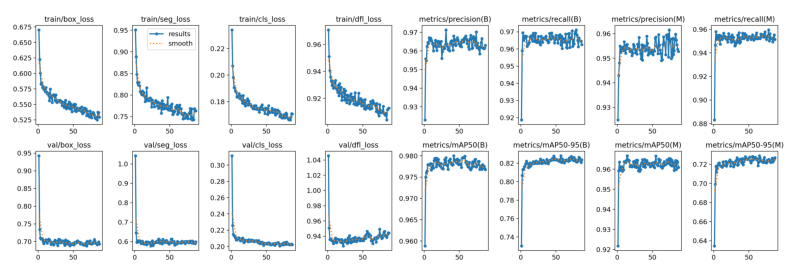

In [6]:
plt.figure(figsize = (10, 20))
plt.imshow(Image.open('/kaggle/working/yolo-finetune/advanced_run/results.png'))
plt.axis('off')
plt.show()

In [7]:
results = model.val(data = data_path, split = "test")

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,260,794 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /kaggle/working/Nguyen_dep_trai_all_in_one-10/test/labels... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<00:00, 1036.39it/s]

val: New cache created: /kaggle/working/Nguyen_dep_trai_all_in_one-10/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


                   all        217        435      0.976      0.985      0.992      0.809       0.96      0.965      0.964      0.714
                   car         25         25      0.992          1      0.995      0.913      0.997          1      0.995      0.888
             crosswalk         19         19      0.934          1      0.995      0.935      0.936          1      0.995      0.876
              hw-entry         22         22          1      0.975      0.995      0.828          1      0.972      0.995      0.699
               hw-exit         21         21      0.992          1      0.995      0.835      0.947      0.952      0.966      0.735
                  lane         76        143      0.986      0.986      0.994      0.842      0.988      0.986      0.994      0.612
              no_entry         28         28      0.984          1      0.995      0.888      0.986          1      0.995      0.845
              obstacle          2          2      0.892          1   

invalid value encountered in less
invalid value encountered in less


Speed: 1.8ms preprocess, 5.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/val


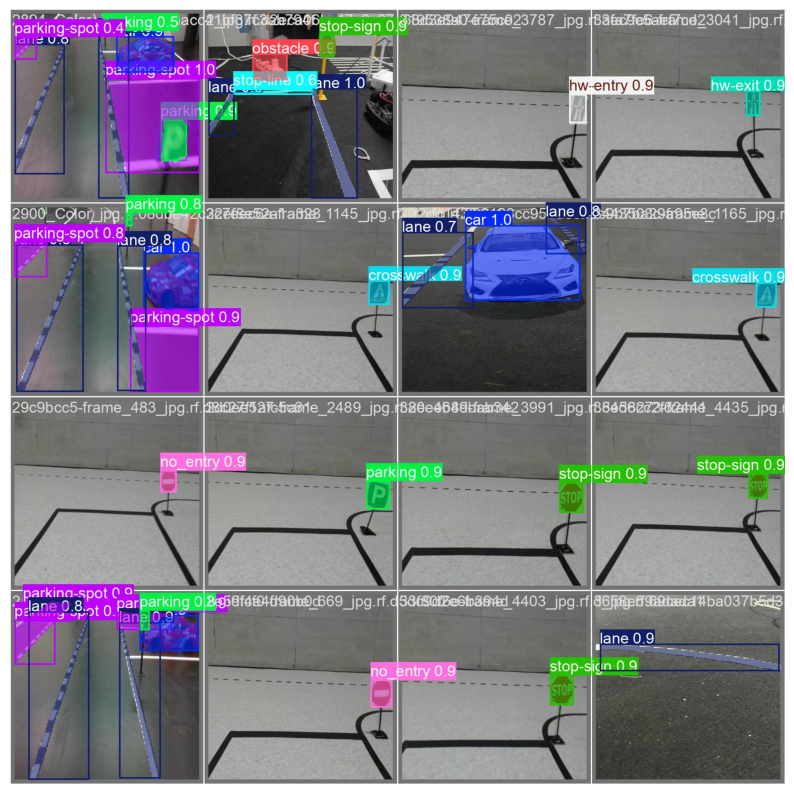

In [8]:
plt.figure(figsize = (10, 20))
plt.imshow(Image.open('/kaggle/working/runs/segment/val/val_batch2_pred.jpg'))
plt.axis('off')
plt.show()

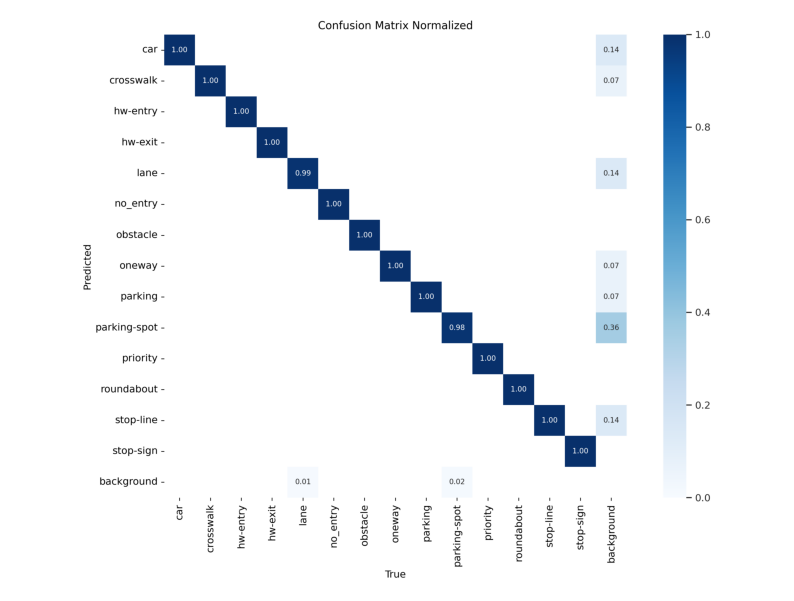

In [9]:
plt.figure(figsize = (10, 20))
plt.imshow(Image.open('/kaggle/working/runs/segment/val/confusion_matrix_normalized.png'))
plt.axis('off')
plt.show()